## Importing the data

First of all, the txt file "data.txt" is loaded with pandas in order to start treating the data. As it can be seen, the dates appear with decimals so some transformation will be performed in order to work with proper datetime format.

In [1]:
import pandas as pd
#Loading the datafile "data.txt".
ds = pd.read_csv('data.txt', sep='\t', skiprows=111, header=None, names=['StationID', 'Series', 'Date', 'Temperature', 'Uncertainty', 'Observations', 'TimeOfObservations'])
print(ds)

          StationID  Series      Date  Temperature  Uncertainty  Observations  \
0                 1       1  1986.125      -35.600       0.0500           -99   
1                 1       1  1986.208      -53.400       0.0500           -99   
2                 1       1  1986.292      -55.300       0.0500           -99   
3                 1       1  1986.375      -62.400       0.0500           -99   
4                 1       1  1986.458      -63.700       0.0500           -99   
...             ...     ...       ...          ...          ...           ...   
20599150     611317       1  2019.292      -14.727       0.0673            30   
20599151     611317       1  2019.375       -2.846       0.0446            31   
20599152     611317       1  2019.458        1.675       0.2506            30   
20599153     611317       1  2019.542        8.721       0.5517            31   
20599154     611317       1  2019.625        5.664       0.1118            31   

          TimeOfObservation

## Function to transform decimal dates into datetime format

In order, to transform decimal dates to datetime the function **convert_decimal_date_to_datetime** is created and applied to the Date column of **ds**, which is the dataframe where the file was loaded.

In [2]:
import math
from datetime import date,timedelta
# Function creation. Input is the decimal date and it returns the date as a datetime object.
def convert_decimal_date_to_datetime(decimal_date):
    """Takes a date of 'float' type, and converts it to a proper datetime format"""
    
    decimal, year = math.modf(decimal_date)
    year = int(year)

    def is_leap_year(year):
        return (year % 4 == 0 and year % 100 != 0) or year % 400 == 0

    days_in_year = 366 if (is_leap_year(year) == True) else 365
    days_in_decimal_date = round(decimal * days_in_year)

    days_as_timedelta = timedelta(days=days_in_decimal_date)
    date_as_datetime = date(year, 1, 1) + days_as_timedelta
    
    return date_as_datetime

#Application of the function to the corresponding column of ds.
ds["Date"] = ds["Date"].apply(convert_decimal_date_to_datetime)


In [3]:
# ds is printed in order to check that the changes were applied. As it can be seen the date has changed to a proper datetime format.
print(ds)

          StationID  Series        Date  Temperature  Uncertainty  \
0                 1       1  1986-02-16      -35.600       0.0500   
1                 1       1  1986-03-18      -53.400       0.0500   
2                 1       1  1986-04-18      -55.300       0.0500   
3                 1       1  1986-05-18      -62.400       0.0500   
4                 1       1  1986-06-17      -63.700       0.0500   
...             ...     ...         ...          ...          ...   
20599150     611317       1  2019-04-18      -14.727       0.0673   
20599151     611317       1  2019-05-18       -2.846       0.0446   
20599152     611317       1  2019-06-17        1.675       0.2506   
20599153     611317       1  2019-07-18        8.721       0.5517   
20599154     611317       1  2019-08-17        5.664       0.1118   

          Observations  TimeOfObservations  
0                  -99                 -99  
1                  -99                 -99  
2                  -99              

## Datetime convertion and resampling the data by month

Now that we have the datetime column properly transformed it is needed to convert it to datetime, in order to resample the data by month as specified in the first task.

In [4]:
#Conversion of the date column to datetime.
ds["Date"] = pd.to_datetime(ds["Date"], format = "%Y-%m-%d")
# We then pass the date column to the index, which will be really helpful when plotting. 
ds = ds.set_index('Date')
# Resampling the data by month
ds_monthly = ds.resample('M').mean()
print(ds.head(30))
#Check that we do not have any missing value on the temperature column.
print(ds['Temperature'].isna().sum())


            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
1986-02-16          1       1        -35.6         0.05           -99   
1986-03-18          1       1        -53.4         0.05           -99   
1986-04-18          1       1        -55.3         0.05           -99   
1986-05-18          1       1        -62.4         0.05           -99   
1986-06-17          1       1        -63.7         0.05           -99   
1986-07-18          1       1        -60.7         0.05           -99   
1986-08-17          1       1        -59.5         0.05           -99   
1986-10-17          1       1        -52.7         0.05           -99   
1986-11-16          1       1        -39.1         0.05           -99   
1986-12-17          1       1        -29.1         0.05           -99   
1987-01-16          1       1        -27.6         0.05           -99   
1987-02-16          1       1        -41.7         

In [5]:
# Dataframe resampled by month first 20 lines.
print(ds_monthly.head(20))

            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
1701-01-31   583444.0     1.0       -4.195       0.0275         -99.0   
1701-02-28   583444.0     1.0       -1.500       0.0275         -99.0   
1701-03-31   583444.0     1.0        1.600       0.0275         -99.0   
1701-04-30        NaN     NaN          NaN          NaN           NaN   
1701-05-31        NaN     NaN          NaN          NaN           NaN   
1701-06-30   583444.0     1.0       15.400       0.0275         -99.0   
1701-07-31   583444.0     1.0       18.900       0.0275         -99.0   
1701-08-31   583444.0     1.0       15.800       0.0275         -99.0   
1701-09-30        NaN     NaN          NaN          NaN           NaN   
1701-10-31        NaN     NaN          NaN          NaN           NaN   
1701-11-30        NaN     NaN          NaN          NaN           NaN   
1701-12-31   583444.0     1.0       -0.500       0.

In [6]:
# Checking how the monthly dataframe is structured.
ds_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3828 entries, 1701-01-31 to 2019-12-31
Freq: M
Data columns (total 6 columns):
StationID             3815 non-null float64
Series                3815 non-null float64
Temperature           3815 non-null float64
Uncertainty           3815 non-null float64
Observations          3815 non-null float64
TimeOfObservations    3815 non-null float64
dtypes: float64(6)
memory usage: 209.3 KB


In [7]:
# Filling the temperature NaN values with backward filling, which propagates the first observed non-null value backward until another non-null value is met.
ds_monthly['Temperature'] = ds_monthly['Temperature'].fillna(method='bfill')
print(ds_monthly.head(20))
# Check again the info, to see if we fixed the NaN values present on the temperature column
ds_monthly.info()

            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
1701-01-31   583444.0     1.0       -4.195       0.0275         -99.0   
1701-02-28   583444.0     1.0       -1.500       0.0275         -99.0   
1701-03-31   583444.0     1.0        1.600       0.0275         -99.0   
1701-04-30        NaN     NaN       15.400          NaN           NaN   
1701-05-31        NaN     NaN       15.400          NaN           NaN   
1701-06-30   583444.0     1.0       15.400       0.0275         -99.0   
1701-07-31   583444.0     1.0       18.900       0.0275         -99.0   
1701-08-31   583444.0     1.0       15.800       0.0275         -99.0   
1701-09-30        NaN     NaN       -0.500          NaN           NaN   
1701-10-31        NaN     NaN       -0.500          NaN           NaN   
1701-11-30        NaN     NaN       -0.500          NaN           NaN   
1701-12-31   583444.0     1.0       -0.500       0.

## Plotting of the monthly data

First, I tried to use seaborn to plot the monhtly data, but as can be seen it raised a weird Warning. Therefore, I decided to plot it using matplotlib. To answer the first question, it can appreciated that there is a lot of noise. Therefore, it can not be concluded that the graph follows any tendency at all. Let's try with the annual evolution and see if it improved our understanding of the data to reach a decision regarding climate change.

In [8]:
import seaborn as sns
sns.lineplot(x=ds_monthly.index, y="Temperature", lw=1, data=ds_monthly)

C:\Users\Alex\FinalAnaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


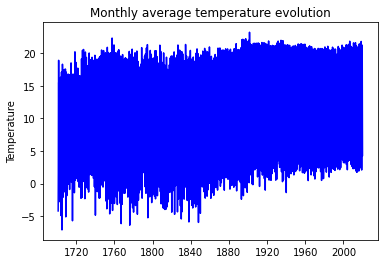

In [9]:
import matplotlib.pyplot as plt
plt.plot(ds_monthly['Temperature'], color= 'blue', lw = 1.5)
plt.title("Monthly average temperature evolution")
plt.ylabel('Temperature')
plt.show()

## Annual data

Here we are resampling the original dataframe by year instead of by month, which will help us plot the average annual evolution of the differents station's temperature.

In [10]:
# Resampling annual data
ds_annual = ds.resample('A').mean()
print(ds_annual)
ds_annual.info()

                StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                        
1701-12-31  583444.000000     1.0     6.500714     0.027500    -99.000000   
1702-12-31  583444.000000     1.0     6.816667     0.027500    -99.000000   
1703-12-31  583444.000000     1.0     7.391667     0.042500    -99.000000   
1704-12-31  583444.000000     1.0     6.250000     0.050000    -99.000000   
1705-12-31  583444.000000     1.0     7.000000     0.050000    -99.000000   
...                   ...     ...          ...          ...           ...   
2015-12-31  380520.323996     1.0    12.014847     0.093335     14.366321   
2016-12-31  379784.180311     1.0    12.224383     0.095435     14.642319   
2017-12-31  379771.485276     1.0    12.079012     0.100539     19.014905   
2018-12-31  386594.533140     1.0    11.718662     0.096493     20.012834   
2019-12-31  380177.364543     1.0    11.727244     0.106731     24.331102   

## Plotting of annual data

Here, I have used seaborn to plot the annual data and it worked. As it can be appreciated there is an upward tendency of the temperature as we approximate to 2019. However, it suffers a lot of oscilations, which we will try to solve by calculating the moving average .

Text(0.5, 1.0, 'Annual Average temperature evolution')

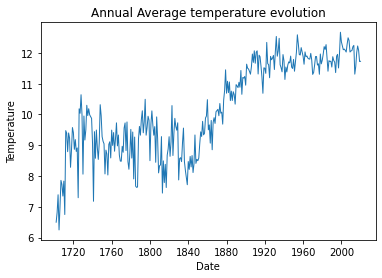

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=ds_annual.index, y="Temperature", lw=1, data=ds_annual)
plt.title("Annual Average temperature evolution")


## Decade and moving average graph

Here, I just did additional work to the one specified in the assignment, since I was curious to see the tendency when we took into account decades instead of just years. Therefore, I resampled the data by decade. After that I calculated the moving average taking into account ten years.

In [12]:
# Resampling data by decade
ds_decade = ds.resample('10A').mean()
# Moving average of ten years.
ds_annual['MA'] = ds_annual['Temperature'].rolling(window=10).mean()
ds_annual['MA'] = ds_annual['MA'].fillna(method='bfill')
print(ds_annual.head(20))
ds_annual.info()
print(ds_decade.head(20))

                StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                        
1701-12-31  583444.000000     1.0     6.500714       0.0275         -99.0   
1702-12-31  583444.000000     1.0     6.816667       0.0275         -99.0   
1703-12-31  583444.000000     1.0     7.391667       0.0425         -99.0   
1704-12-31  583444.000000     1.0     6.250000       0.0500         -99.0   
1705-12-31  583444.000000     1.0     7.000000       0.0500         -99.0   
1706-12-31  539202.333333     1.0     7.858333       0.0500         -99.0   
1707-12-31  539202.333333     1.0     7.725000       0.0500         -99.0   
1708-12-31  533672.125000     1.0     7.350000       0.0500         -99.0   
1709-12-31  536599.882353     1.0     7.835294       0.0500         -99.0   
1710-12-31  503809.000000     1.0     6.750000       0.0500         -99.0   
1711-12-31  450719.000000     1.0     9.475000       0.0500         -99.0   

## Plotting of the decade temperature evolution

As it canbe appreciated in the following plot, when plotting the data by decade we were able to reduce the noise that was experienced when plotting it by year. Here, we can appreciate a clear incresing tendency, which coulde serve us to explain our friend that climate change is real. But we are not going to stope here, and will conitnue analyzing the data.

Text(0.5, 1.0, 'Decade average temperature evolution')

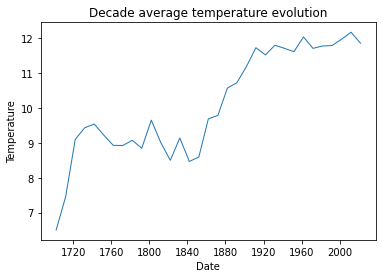

In [13]:
import seaborn as sns
sns.lineplot(x=ds_decade.index, y="Temperature", estimator=None, lw=1, data=ds_decade)
plt.title("Decade average temperature evolution")

## Plotting of the moving average taking into account 10 years

As anticipated, here we are plotting the moving average taking into account 10 years and the annual average temperature in the same graph. As it can be appreciated, the moving average allowed us to eliminate the noise that was present when plotting the evolution just year by year. Therefore, as the decade graph we saw before reflects a clear increasing tendency of the temperature.

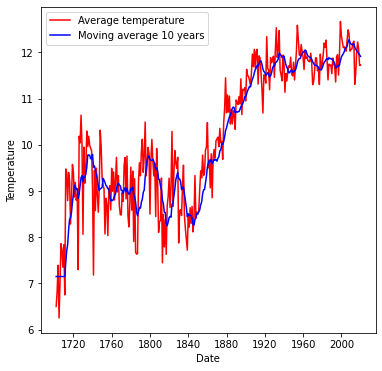

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x=ds_annual.index, 
             y='Temperature',
             color='r',
           data= ds_annual)
sns.lineplot(x=ds_annual.index, 
             y='MA', 
             color='b', 
            data= ds_annual)    
ax.legend(['Average temperature', 'Moving average 10 years'], facecolor='w')
plt.ylabel('Temperature')
plt.show()

In [15]:
# Sorting the index
ds = ds.sort_index()
print(ds.head(25))

            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
1701-01-16     591974       1        -4.20        0.050           -99   
1701-01-16     574914       1        -4.19        0.005           -99   
1701-02-16     574914       1        -1.50        0.005           -99   
1701-02-16     591974       1        -1.50        0.050           -99   
1701-03-18     591974       1         1.60        0.050           -99   
1701-03-18     574914       1         1.60        0.005           -99   
1701-06-17     591974       1        15.40        0.050           -99   
1701-06-17     574914       1        15.40        0.005           -99   
1701-07-18     591974       1        18.90        0.050           -99   
1701-07-18     574914       1        18.90        0.005           -99   
1701-08-17     591974       1        15.80        0.050           -99   
1701-08-17     574914       1        15.80        0

In [16]:
# Get to know your data. How many unique values are in the StationID column
print(ds['StationID'].nunique())

50985


## First approach to solving the last question

Here is my first approach towards solving the last question. At first, I thought okay the stations that would be during the whole period are the ones that would appear in the beginning (1701) as well as in the end (2019). Therefore, I decided to just find out which stations were present in 1701, which as shown by the code below were the following: **591974** and **574914**. If these two companies were present as well in 2019, then these two companies were present the whole period, that was my first thought. But as it is going to be seen later, I improved the approach to make it more accurate, since the statement says that our friend is skeptical and some stations can disappear and appear.

In [17]:
# Calculation which stations were present in 1701
unique_values1701 = ds.loc['1701-01-16':'1701-12-31', 'StationID'].unique()
print(unique_values1701)
# Converting the index to a string, in order to be able to call the method contains.
ds.index = ds.index.astype(str)
# Getting the data corresponding to 2019 from the original dataframe
unique_values2019 = ds.index.str.contains('2019')
df_2019 = ds.loc[unique_values2019]
print(df_2019)
# Getting the stations that were present in 2019, in order to see if the ones present in 1701 were present as well in 2019.
unique_values_2019 = df_2019.loc['2019-01-16':'2019-12-17', 'StationID'].unique()
print(unique_values_2019)

# Here the common stations that 1701 and 2019 had are obtained. 
common_station = []
for i in range(0, len(unique_values_2019)-1):
    if unique_values_2019[i] in unique_values1701:
        common_station.append(unique_values_2019[i])
print(common_station)

[591974 574914]
            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
2019-01-16     455534       1       -1.000       0.0500           -99   
2019-01-16     568365       1      -20.756       0.1491            31   
2019-01-16     435446       1      -11.762       0.1019            31   
2019-01-16     545435       1      -18.166       0.0064            31   
2019-01-16      27744       1        6.637       0.0065            30   
...               ...     ...          ...          ...           ...   
2019-12-17     530995       1       -4.245       0.1776            31   
2019-12-17     421689       1       -8.645       0.0482            31   
2019-12-17     473843       1       10.830       0.0065            30   
2019-12-17     421704       1       -0.665       0.0965            31   
2019-12-17     519093       1        0.932       0.0065            30   

            TimeOfObservations  
D

As it can be seen, the code above gave us that the two stations that were present in 1701 were also present in 2019. However, this is not the best approach to take since they might have disappear for one year or so along the way. Therefore, I decided to take another more accurate approach, which will be explained in line 21 and 22.

In [18]:
# Getting data corresponding to the year 2000
unique_values2000 = ds.index.str.contains('2000')
df_2000 = ds.loc[unique_values2000]
print(df_2000)
# Getting data corresponding to the year 1850
unique_values1850 = ds.index.str.contains('1850')
df_1850 = ds.loc[unique_values1850]
print(df_1850)

            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
2000-01-16     420781       1       29.413       0.0737            23   
2000-01-16     160085       1        5.142       0.1046            31   
2000-01-16     441371       1       25.543       0.3398            31   
2000-01-16     445120       1        6.948       0.2011            31   
2000-01-16     455628       1      -22.498       0.0064            31   
...               ...     ...          ...          ...           ...   
2000-12-17     595376       1       22.626       0.0064            31   
2000-12-17     533591       1        3.955       0.0064            31   
2000-12-17     426037       1      -12.919       0.0318            31   
2000-12-17     593016       1       17.135       0.0064            31   
2000-12-17     520714       1       -2.700       0.0500           -99   

            TimeOfObservations  
Date             

In [19]:
# Getting to know the number of different stations present in 2000
unique_values_2000 = df_2000.loc['2000-01-16':'2000-12-17', 'StationID'].unique()
print(len(unique_values_2000))
# Getting to know the number of different stations present in 1850
unique_values_1850 = df_1850.loc['1850-01-16':'1850-12-17', 'StationID'].unique()
print(len(unique_values_1850))

23886
289


## Period 1750 - 2019 analysis

The new approach that I took to solve the last question was the following. First, to get to know which stations were present during this period (1750-2019), we need to know the number of unique days during that period. If the number of unique days during this period is equal to the number of stations' appearances, then the stations that met this condition were present in the whole period. I also took into account companies that the number of appearances was just 1 or 2 units lower than the number of days, since they could be missing those days because of some gathering of data error. For example, the period has 3240 days if the number of appearances of some stations is equal to 3239 or 3238, they are considered as they were present the whole period, since the number of appearances is very representative.

In [20]:
# Getting the values present in 1750
unique_values1750 = ds.index.str.contains('1750')
df_1750 = ds.loc[unique_values1750]
print(df_1750)

# Getting the stations that were present in 1750
unique_values_1750 = df_1750.loc['1750-01-16':'1750-12-17', 'StationID'].unique()
print(unique_values_1750)

# Getting the data for the whole period
period_to_analyze = ds.loc['1750-01-16':'2019-12-17',]
print(period_to_analyze)

# Getting the number of days of the period
number_of_days = period_to_analyze.index.nunique()
print(number_of_days)

#Initializing a list that will store the stations present in the whole period
stations_whole_period = []

# For loop to obtain the stations present the whole period.
period_to_analyze['StationID'] = period_to_analyze.iloc[:,0].astype(str)
for i in unique_values_1750:
    number_of_times_i = period_to_analyze.iloc[:,0].str.contains(str(i))
    number_of_times_i_2 = number_of_times_i.to_frame()
    final_number_of_times_i = number_of_times_i_2['StationID'].sum()
    if final_number_of_times_i == number_of_days or number_of_days == final_number_of_times_i + 1 or number_of_days == final_number_of_times_i + 2:
        stations_whole_period.append(i)
print(stations_whole_period)
    

            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
1750-01-16     573902       1        -1.20        0.050           -99   
1750-01-16     524126       1        -2.70        0.050           -99   
1750-01-16     444363       1         4.19        0.005           -99   
1750-01-16     574914       1         1.20        0.050           -99   
1750-01-16     577531       1        -0.50        0.050           -99   
...               ...     ...          ...          ...           ...   
1750-12-17     591974       1         1.50        0.050           -99   
1750-12-17     444363       1         5.62        0.005           -99   
1750-12-17     574914       1         1.50        0.050           -99   
1750-12-17     450719       1         2.40        0.050           -99   
1750-12-17     573902       1        -8.60        0.050           -99   

            TimeOfObservations  
Date             

C:\Users\Alex\FinalAnaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[577531, 450719]


## Functions that will get us the data from each of the stations obtained previously

In [21]:
# function to return the data of each station resampled by year
def selecting_stations_from_df_and_group_it_by_year(df, station, column):
    rows_with_station = df.iloc[:,0].str.contains(str(station))
    df_with_station = df[rows_with_station]
    df_with_station[column] = df_with_station.iloc[:,0].astype(float)
    df_with_station.index = pd.to_datetime(df_with_station.index, format= "%Y-%m-%d")
    df_with_station_annual = df_with_station.resample('A').mean()
    return df_with_station_annual

# function to calculated the moving average of each station during 10 years
def calculating_moving_average_for_10_years(df, column, new_column):
    df[new_column] = df[column].rolling(window=10).mean()
    df[new_column] = df[new_column].fillna(method='bfill')
    return df

# StationID 577531
station_577531_annual = selecting_stations_from_df_and_group_it_by_year(period_to_analyze, 577531, 'StationID')
station_577531_annual_with_moving_average = calculating_moving_average_for_10_years(station_577531_annual, 'Temperature', 'MA')
print(station_577531_annual_with_moving_average.head(20))

# StationID 450719
station_450719_annual = selecting_stations_from_df_and_group_it_by_year(period_to_analyze, 450719, 'StationID')
station_450719_annual_with_moving_average = calculating_moving_average_for_10_years(station_450719_annual, 'Temperature', 'MA')
print(station_450719_annual_with_moving_average.head(20))
    

C:\Users\Alex\FinalAnaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


            StationID  Series  Temperature  Uncertainty  Observations  \
Date                                                                    
1750-12-31   577531.0     1.0     5.891667         0.05         -99.0   
1751-12-31   577531.0     1.0     4.683333         0.05         -99.0   
1752-12-31   577531.0     1.0     5.766667         0.05         -99.0   
1753-12-31   577531.0     1.0     5.091667         0.05         -99.0   
1754-12-31   577531.0     1.0     5.308333         0.05         -99.0   
1755-12-31   577531.0     1.0     4.450000         0.05         -99.0   
1756-12-31   577531.0     1.0     4.558333         0.05         -99.0   
1757-12-31   577531.0     1.0     5.450000         0.05         -99.0   
1758-12-31   577531.0     1.0     4.500000         0.05         -99.0   
1759-12-31   577531.0     1.0     5.550000         0.05         -99.0   
1760-12-31   577531.0     1.0     4.625000         0.05         -99.0   
1761-12-31   577531.0     1.0     6.091667         

## Plotting of the station corresponding to StationID 577531, which was present during the whole period

As it was experienced before, the annual average evolution shows a lot of noise. However the moving average shows also an increasing trend on temperature when approximating to 2019, without noise, which will serve us as prove to tell our friend that climate change is real. 

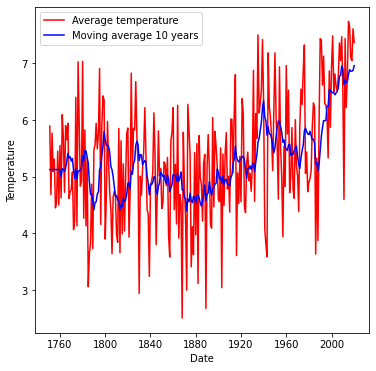

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x=station_577531_annual_with_moving_average.index, 
             y='Temperature',
             color='r',
           data= station_577531_annual_with_moving_average)
sns.lineplot(x=station_577531_annual_with_moving_average.index, 
             y='MA', 
             color='b', 
            data= station_577531_annual_with_moving_average)    
ax.legend(['Average temperature', 'Moving average 10 years'], facecolor='w')
plt.ylabel('Temperature')
plt.show()

## Plotting of the station corresponding to StationID 577531, which was present during the whole period

Same reasoning as the plot we just saw before.

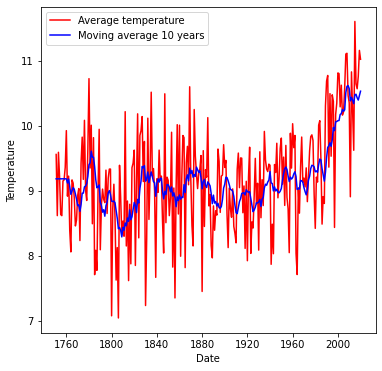

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(x=station_450719_annual_with_moving_average.index, 
             y='Temperature',
             color='r',
           data= station_450719_annual_with_moving_average)
sns.lineplot(x=station_450719_annual_with_moving_average.index, 
             y='MA', 
             color='b', 
            data= station_450719_annual_with_moving_average)    
ax.legend(['Average temperature', 'Moving average 10 years'], facecolor='w')
plt.ylabel('Temperature')
plt.show()